In [31]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.signal import find_peaks
from scipy.signal import peak_widths

In [2]:
status = pd.read_csv("echidna_clone_status.8.1.24.csv", index_col=0).dropna().T
status.columns = ["echid_status_8.1.24"]

In [3]:
ip = pd.read_csv("var_exp_mt.csv", index_col=0).dropna()

In [4]:
import os
all_delta_eta = pd.DataFrame()
eta_mode = pd.read_csv("all_patient_neutral_values.csv", index_col=0)
PATH = "params_mt_refined/samples/"
for patient in os.listdir(PATH):
    if "_" not in patient:
        #print(patient)
        eta = pd.read_csv("params_mt_refined/samples/"+patient+"/eta.csv", index_col=0)
        delta_eta = pd.DataFrame()
        for cluster in eta.columns:
            delta_eta[patient+"_"+cluster]=np.asarray(eta[cluster])-eta_mode[patient+"_"+cluster][0]
        delta_eta.index = eta.index
        all_delta_eta = pd.concat((all_delta_eta, delta_eta),axis=1)

In [5]:
hvg_dict = {}
for patient in os.listdir(PATH):
    if "_" not in patient:
        #print(patient)
        X = sc.read_h5ad("params_mt_refined/samples/"+patient+"/X.h5")
        X = X[:, ip.index]
        var = X.X.var(axis=0)
        thresh = np.quantile(var, 0.75)
        var = pd.DataFrame(var, index=X.var_names)
        hvg_dict[patient] = var[var[0]>thresh].index

/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [6]:
exp = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        #print(patient)
        X = sc.read_h5ad("params_mt_refined/samples/"+patient+"/X.h5")
        X = X[:, ip.index]
        obs = X.obs
        df = X.to_df()
        for clust in np.unique(obs["leiden"]):
            exp[patient+"_"+clust] = df.loc[obs[obs.leiden==clust].index].mean(axis=0)

/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [7]:
degs = {}
for patient in os.listdir(PATH):
    if "_" not in patient and "F01" not in patient and "F12" not in patient:
        print(patient)
        X = sc.read_h5ad("params_mt_refined/samples/"+patient+"/X.h5")
        X = X[:, ip.index]
        var = X.X.var(axis=0)
        thresh = np.quantile(var, 0.75)
        gene_filter = var > thresh
        X = X[:, gene_filter]
        sc.tl.rank_genes_groups(X, groupby="echid_status_8.1.24", method='wilcoxon')
        deg = sc.get.rank_genes_groups_df(X, group="growing").sort_values(by="logfoldchanges",ascending=False)
        degs[patient] = deg

F16


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F03


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F02


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


R310


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


R319


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [8]:
degs_shrinking = {}
for patient in os.listdir(PATH):
    if "_" not in patient and "F01" not in patient and "F12" not in patient:
        print(patient)
        X = sc.read_h5ad("params_mt_refined/samples/"+patient+"/X.h5")
        X = X[:, ip.index]
        var = X.X.var(axis=0)
        thresh = np.quantile(var, 0.75)
        gene_filter = var > thresh
        X = X[:, gene_filter]
        sc.tl.rank_genes_groups(X, groupby="echid_status_8.1.24", method='wilcoxon')
        deg = sc.get.rank_genes_groups_df(X, group="shrinking").sort_values(by="logfoldchanges",ascending=False)
        
        degs_shrinking[patient] = deg

F16


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F03


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F02


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


R310


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


R319


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [9]:
all_delta_eta = all_delta_eta.dropna()

In [10]:
wouters = pd.read_csv("wouters_mel_sigs.csv")

/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_13369/1428436661.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,2

In [12]:
def loll_that_pop(patient, condition, deg_dict, states, n_genes=100, custom_left = None, custom_right=None, bw_adjust=.05, prominence=.5):
    deg_df = deg_dict[patient]
    deg_df.index = deg_df.names

    inds = [i for i in hvg_dict[patient] if i in states.index]
    states = states.loc[inds]
    
    plt.figure(figsize=(20,5))
    pt = all_delta_eta[[i for i in all_delta_eta.columns if patient in i]].loc[inds].T
    pt_gr = [i for i in pt.index if status.loc[i]["echid_status_8.1.24"]==condition]
    pt_gr_et = pd.DataFrame(pt.loc[pt_gr].mean(axis=0), index = pt.columns)
    #pt_gr_et = pt.loc[condition]
    #eta_smoothed = scipy.ndimage.gaussian_filter1d(pt_gr_et, sigma=20, radius=500)
    eta_smoothed = scipy.ndimage.gaussian_filter1d(pt_gr_et[0], sigma=20, radius=500)

    
    pt = exp[[i for i in all_delta_eta.columns if patient in i]].loc[inds].T
    pt_gr = [i for i in pt.index if status.loc[i]["echid_status_8.1.24"]==condition]
    pt_gr_exp = pd.DataFrame(pt.loc[pt_gr].mean(axis=0), index = pt.columns)
    #pt_gr_exp = pt.loc[condition]
    print(pt_gr_exp.shape)
    
    pt = ip[[i for i in all_delta_eta.columns if patient in i]].loc[inds].T
    pt_gr = [i for i in pt.index if status.loc[i]["echid_status_8.1.24"]==condition]
    pt_gr_ip = pd.DataFrame(pt.loc[pt_gr].mean(axis=0), index = pt.columns)
    #pt_gr_ip = pt.loc[condition]
    
    icr = np.intersect1d(list(wouters["Immune_resistance_wang"]), pt.columns)
    deg_df = deg_df[deg_df["pvals_adj"]<.05]
    
    genes = deg_df[deg_df["logfoldchanges"]>0].sort_values(by="logfoldchanges", ascending=False).iloc[0:n_genes].index
    genes = np.intersect1d(genes, inds)
    
    density = []
    for gene in genes:
        density.append(list(pt_gr_exp.index).index(gene))
    #get max height of histogram bars
    counts, bin_edges, patches = plt.hist(density, bins=400)
    ax = sns.histplot(density, bins=300, kde=True, kde_kws=dict(bw_adjust=bw_adjust))
    # Extract KDE data
    kde_line = ax.get_lines()[0]  # The first line corresponds to the KDE
    kde_x = kde_line.get_xdata()
    kde_y = kde_line.get_ydata()
    
    plt.clf()   
    

    
    #scale max height for plotting
    scaling_factor = max(pt_gr_exp.loc[genes][0])/max(counts)
    #scaling_factor = max(pt_gr_exp.loc[genes])/max(counts)
    #print(max(counts), max(pt_gr_exp.loc[genes][0]), scaling_factor)
    weights = np.ones_like(density) * scaling_factor

    #plt.plot(kde_x, kde_y)
    plt.fill_between(kde_x, 0, kde_y, color='lightgrey')

    
    # Find peaks
    peaks, _ = find_peaks(kde_y, prominence=prominence)
    
    # Find peak widths
    results_full = peak_widths(kde_y, peaks, rel_height=0.5)  # Width at half prominence
    
    
    # Interpolated x-coordinates for the widths
    left_coords = results_full[2]
    right_coords = results_full[3]
    
    # Convert interpolated coordinates to indices
    left_indices = np.round(left_coords).astype(int)
    right_indices = np.round(right_coords).astype(int)


    #figure out which peaks correspond to amps
    hotspot_inds = []
    #for i in range(len(left_coords)):
    #    if np.mean(eta_smoothed[int(round(kde_x[left_indices[i]],0)):int(round(kde_x[right_indices[i]],0))])>.8*np.std(pt_gr_et[0]):
    #        hotspot_inds.append(i)
    for i in range(len(left_coords)):
        if scipy.stats.mode(states[int(round(kde_x[left_indices[i]],0)):int(round(kde_x[right_indices[i]],0))])[0]==1:
            hotspot_inds.append(i)
            
    peaks = peaks[hotspot_inds]
    left_indices = left_indices[hotspot_inds]
    right_indices = right_indices[hotspot_inds]


    if custom_left is not None:
        left_indices = list(left_indices)+custom_left
        right_indices = list(right_indices)+custom_right
    
    # Plot the results
    #plt.plot(kde_x[peaks], kde_y[peaks], "rx", label="Peaks")
    #plt.hlines(results_full[1][hotspot_inds], kde_x[left_indices], kde_x[right_indices], color="red", lw=2, label="Widths")

    for i in range(len(left_indices)):
        plt.fill_between(kde_x[left_indices[i]:right_indices[i]+1], 0, kde_y[left_indices[i]:right_indices[i]+1], color='lightpink')

    for gene in genes:
        if gene in icr:
            plt.plot([list(pt_gr_exp.index).index(gene),list(pt_gr_exp.index).index(gene)],[0, pt_gr_exp.loc[gene][0]], c='magenta', alpha=.3)
            plt.scatter([list(pt_gr_exp.index).index(gene)],[pt_gr_exp.loc[gene]], c='magenta', s=10)#abs(pt_gr_ip.loc[gene][0])*200)
        else:
            plt.plot([list(pt_gr_exp.index).index(gene),list(pt_gr_exp.index).index(gene)],[0, pt_gr_exp.loc[gene][0]], c='xkcd:bright blue', alpha=.3)
            plt.scatter([list(pt_gr_exp.index).index(gene)],[pt_gr_exp.loc[gene]], c='xkcd:bright blue', s=10)#abs(pt_gr_ip.loc[gene])*200)

    plt.scatter([i for i in range(len(pt_gr_et))],[-.1 for i in range(len(pt_gr_et))], c=eta_smoothed, 
                marker="|", s=300, cmap='coolwarm', vmin=-2, vmax=2)
    plt.colorbar()
    plt.ylabel("Expression")
    
    '''
    genes = deg_df[deg_df["logfoldchanges"]<0].sort_values(by="logfoldchanges", ascending=True).iloc[0:100].index
    for gene in genes:
        plt.plot([list(pt_gr_exp.index).index(gene),list(pt_gr_exp.index).index(gene)],[-.15,-1*pt_gr_exp.loc[gene][0]-.15], c='red')
        plt.scatter([list(pt_gr_exp.index).index(gene)],[-1*pt_gr_exp.loc[gene][0]-.15], c='red', s=abs(pt_gr_ip.loc[gene][0])*100)
    '''

    return pt_gr_exp, pt_gr_ip, np.round(kde_x[left_indices]).astype(int), np.round(kde_x[right_indices]).astype(int)

In [28]:
states = pd.read_csv("r310_states", index_col=0)
for i in states.index:
    for j in states.columns:
        if states.loc[i][j]=="amp":
            states.loc[i][j]=1
        elif states.loc[i][j]=='neut':
            states.loc[i][j]=0
        else:
            states.loc[i][j]=-1

/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_13369/3421711568.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  states.loc[i][j]=1
/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_13369/3421711568.py:7: FutureWarnin

In [29]:
st = status.loc[[i for i in status.index if "R310" in i]]
srt = st[st["echid_status_8.1.24"]=="growing"].index

states_mode = []
for i in states.index:
    states_mode.append(scipy.stats.mode(list(states[srt].loc[i]))[0])

growing_states = pd.DataFrame(states_mode, index=states.index)

st = status.loc[[i for i in status.index if "R310" in i]]
srt = st[st["echid_status_8.1.24"]=="shrinking"].index

states_mode = []
for i in states.index:
    states_mode.append(scipy.stats.mode(list(states[srt].loc[i]))[0])

shrinking_states = pd.DataFrame(states_mode, index=states.index)

(4665, 1)


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


(-0.2, 2.4)

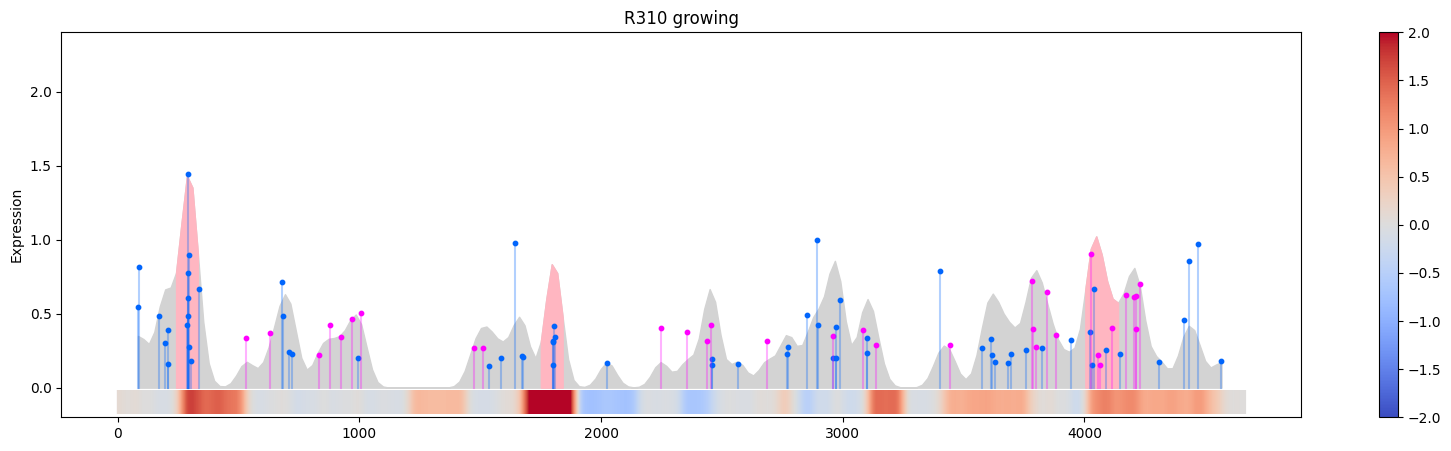

In [32]:
tmp, tmp_ip, x, y = loll_that_pop("R310","growing", degs, growing_states, prominence=.4, bw_adjust=.06)
#plt.plot([270,270],[0,2.5], c='orange', linewidth=3)
#plt.plot([350,350],[0,2.5], c='orange', linewidth=3)

#plt.plot([1850,1850],[0,2.5], c='orange', linewidth=3)
#plt.plot([1920,1920],[0,2.5], c='orange', linewidth=3)

plt.title("R310 growing")
plt.ylim([-.2,2.4])
#plt.savefig("FIGURES/growing_hotspots.pdf",dpi=300)

In [3437]:
degs["R310"].sort_values(by="logfoldchanges")

,names,scores,logfoldchanges,pvals,pvals_adj
names,,,,,
LINC01531,LINC01531,-20.676346,-9.456146,5.656717e-95,2.984533e-94
GALNT18,GALNT18,-20.598370,-9.206072,2.838409e-94,1.489474e-93
ZNF503-AS1,ZNF503-AS1,-20.522305,-8.723436,1.361037e-93,7.103735e-93
SORBS2,SORBS2,-46.819130,-7.495749,0.000000e+00,0.000000e+00
AC010148.1,AC010148.1,-28.130770,-6.855605,4.119679e-174,3.570879e-173
...,...,...,...,...,...
HLA-DQB1,HLA-DQB1,18.694338,5.285332,5.505026e-78,2.554627e-77
TOMM7,TOMM7,29.081406,5.539157,6.169830e-186,5.826528e-185
HLA-DPB1,HLA-DPB1,35.728573,5.950596,1.423624e-279,2.152733e-278


In [3405]:
inds = [i for i in hvg_dict["R310"] if i in growing_states.index]
states = states.loc[inds]

plotlist = []
alls = []
for i in range(len(x)):
    deg_df = degs["R310"].loc[inds]

    deg_df.index = deg_df.names
    deg_df = deg_df.loc[tmp.iloc[x[i]:y[i]].index]
    deg_df = deg_df[deg_df["pvals_adj"]<.05]
    deg_df = deg_df[deg_df["logfoldchanges"]>0].sort_values(by="logfoldchanges",ascending=False)
    alls+=list(deg_df.index)
    print(deg_df.iloc[0:10].index)
    plotlist+=list(deg_df.iloc[0:10].index)

Index(['S100A11', 'RAB13', 'S100A13', 'S100A16', 'S100A1', 'PSMB4', 'S100A4',
       'S100A10', 'OLFML3', 'RHOC'],
      dtype='object', name='genes')
Index(['HLA-DRA', 'HLA-DPB1', 'HLA-DQB1', 'HLA-DRB1', 'PSMB8', 'PSMB9', 'LSM2',
       'HMGA1', 'TUBB', 'CLIC1'],
      dtype='object', name='genes')
Index(['C19orf53', 'UBL5', 'UQCR11', 'GPX4', 'NDUFA11', 'UBA52', 'OAZ1',
       'RPS15', 'GADD45GIP1', 'PRDX2'],
      dtype='object', name='genes')


In [3117]:
hot_ip = tmp_ip.loc[alls]

In [3118]:
hot_ip = hot_ip[hot_ip[0]>0]

In [3119]:
df = degs["R310"]
df = df[df["pvals_adj"]<.05]
df = df[df["logfoldchanges"]>0]
hot_ip.loc[[i for i in df.index if i in hot_ip.index]].sort_values(by=0, ascending=False).iloc[0:20].index

Index(['SNRPC', 'SMIM29', 'HMGA1', 'RNF5', 'PSMB8', 'HSPA1A', 'MRPS18B',
       'HCG11', 'CLIC1', 'LSM2', 'SNHG32', 'SLC39A7', 'MTCH1', 'CSNK2B',
       'RPL10A', 'TUBB', 'HCP5', 'BTN2A2', 'TAPBP', 'CUTA'],
      dtype='object', name='genes')

In [3121]:
neut_ip = tmp_ip.loc[np.intersect1d(tmp_ip.index, growing_states[growing_states[0]==0].index)]

In [3164]:
df = degs["R310"]
df = df[df["pvals_adj"]<.05]
df = df[df["logfoldchanges"]>0]
abs(neut_ip).loc[[i for i in df.index if i in neut_ip.index]].sort_values(by=0, ascending=True).iloc[0:20].index

Index(['MYOF', 'NOL9', 'GRB2', 'PSMD1', 'PTGES3', 'ZFP36L2', 'NRBP1', 'TRIM25',
       'EIF2S1', 'TPD52', 'FAU', 'SEC13', 'RPL23A', 'ATP5F1B', 'CAPZB',
       'MAGED2', 'CREM', 'LAMTOR1', 'SELENOH', 'PPM1A'],
      dtype='object', name='genes')

In [3278]:
moran = pd.read_csv("R310_Moran.csv", index_col=0)

In [3291]:
#intersect = np.intersect1d(df.index, moran.index)
intersect = np.intersect1d(moran.index, np.intersect1d(tmp_ip.index, growing_states[growing_states[0]!=-1].index))

In [3292]:
alls_intersect = intersect #np.intersect1d(intersect, alls)

In [3217]:
ip_r310_int = ip[srt].loc[intersect]

In [3193]:
show_elham = pd.DataFrame()
show_elham["GDX"] = tmp_ip.loc[intersect]
show_elham["Moran's I"] = moran["I"].loc[intersect]

In [3196]:
show_elham.sort_values(by="GDX", ascending=False).iloc[0:20]

,GDX,Moran's I
genes,,
TUBB2A,0.830430,0.021794
SNRPC,0.819559,0.026002
TMEM14C,0.817366,0.022710
SMIM29,0.807242,-0.008148
HMGA1,0.805951,0.000202
RNF5,0.805664,0.016393
MRPS18A,0.805549,-0.000177
TMEM14A,0.805169,0.008069
DNPH1,0.803219,0.010991


In [3197]:
high_gdx = tmp_ip.loc[intersect]
high_gdx = high_gdx[high_gdx[0]>.26]
high_gdx_hotspot = np.intersect1d(high_gdx.index, alls)
high_gdx_nonhotspot = [i for i in high_gdx.index if i not in alls]
low_gdx = tmp_ip.loc[intersect]
low_gdx = low_gdx[low_gdx[0]<.26]
low_gdx_hotspot = np.intersect1d(low_gdx.index, alls)
low_gdx_nonhotspot = [i for i in low_gdx.index if i not in alls]

In [3233]:
ip_r310_int = ip_r310_int.loc[intersect]

In [3407]:
st = status.loc[[i for i in status.index if "R310" in i]]
srt = st[st["echid_status_8.1.24"]=="growing"].index

df = degs["R310"]
df = df[df.pvals_adj<.05]
df = df[df.logfoldchanges>0]

data = ip[srt]
data['gene'] = data.index
data.set_index('gene', inplace=True)
#data['variance'] = data.var(axis=1)

filtered_data = data.loc[df.index]

# Reset index to have gene as a column again
filtered_data.reset_index(inplace=True)

data_long = filtered_data.melt(id_vars=['names'], var_name='cluster', value_name='score')
data_long.columns = ["gene","cluster","score"]
# Rank genes within each cluster
data_long['rank'] = data_long.groupby('cluster')['score'].rank(ascending=False)


/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_31817/3041925169.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3406]:
len(alls)

194

In [3409]:
filtered_data.shape

(1691, 5)

In [3350]:
subset_genes_high = alls
results = []
for cluster in data_long['cluster'].unique():
    es, p_value, std = permutation_test_es(data_long, cluster, subset_genes_high, n_permutations=10000)
    results.append({'cluster': cluster, 'enrichment_score': es, 'p_value': p_value, 'std': std})

results_df = pd.DataFrame(results)
results_df['p_value_adj'] = fdr_correction(results_df['p_value'], alpha=0.05)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1744.69it/s]


In [3351]:
results_df

,cluster,enrichment_score,p_value,std,p_value_adj
0,R310_3,0.421486,0.0001,0.026623,0.0001
1,R310_5,0.525020,0.0001,0.026065,0.0001
2,R310_6,0.276075,0.0001,0.026849,0.0001
3,R310_9,0.314452,0.0001,0.026647,0.0001


In [2997]:
deg_icrs = df.loc[np.intersect1d(df.index, wouters["Immune_resistance_wang"].dropna())]

In [3432]:
len(ext_deg_icr)

117

In [3425]:
st[st["echid_status_8.1.24"]=="growing"].index

Index(['R310_3', 'R310_5', 'R310_6', 'R310_9'], dtype='object')

In [3427]:
st[st["echid_status_8.1.24"]=="shrinking"].index

Index(['R310_0', 'R310_1', 'R310_10', 'R310_11', 'R310_2', 'R310_4', 'R310_7',
       'R310_8'],
      dtype='object')

In [3424]:
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)

(92,)
(468,)
(184,)
(936,)


In [2998]:
hotspot_deg_icr = deg_icrs.loc[np.intersect1d(deg_icrs.index, all_hotspot_genes)]

In [ ]:
'ANP32E' 'CA14' 'DDX39A' 'EEF2' 'EIF3G' 'FARSA' 'HMGA1' 'ILF2' 'ILF3'
 'LSM4' 'MRPL4' 'MRPS21' 'NDUFA11' 'POLR2E' 'PSMD4' 'RPL10A' 'RPL18A'
 'RPS15' 'RPS15A' 'RPS18' 'RPS2' 'RPS27' 'RSL1D1' 'SMARCA4' 'SNRPC'
 'TIMM13' 'TUBB' 'UBL5'

In [3439]:
hotspot_deg_icr.index

Index(['CA14', 'CCT3', 'EEF2', 'EIF3G', 'FARSA', 'HMGA1', 'ILF2', 'ILF3',
       'MRPS21', 'NDUFA11', 'NDUFA13', 'POLR2E', 'PSMD4', 'RPL10A', 'RPL18A',
       'RPS15', 'SMARCA4', 'SNRPC', 'SSR2', 'TUBB', 'UBA52', 'UBL5',
       'UQCRFS1'],
      dtype='object', name='names')

In [2999]:
ext_deg_icr = deg_icrs.loc[[i for i in deg_icrs.index if i not in all_hotspot_genes]]

In [3418]:
from decimal import Decimal

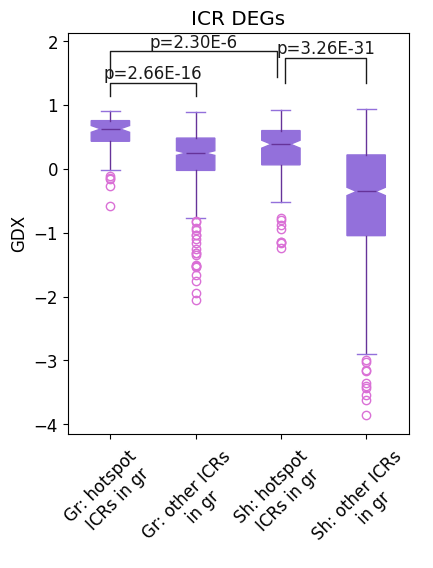

In [3433]:
srt = st[st["echid_status_8.1.24"]=="growing"].index
data1 = np.asarray(ip[srt].loc[hotspot_deg_icr.index]).flatten()
data2 = np.asarray(ip[srt].loc[ext_deg_icr.index]).flatten()

srt = st[st["echid_status_8.1.24"]=="shrinking"].index
data3 = np.asarray(ip[srt].loc[hotspot_deg_icr.index]).flatten()
data4 = np.asarray(ip[srt].loc[ext_deg_icr.index]).flatten()

data = [data1, data2, data3, data4]


# Create the boxplot
plt.figure(figsize=(4.4, 5.2))
c='mediumpurple'
plt.boxplot(data, labels=["Growing Hotspot ICRs", "Growing Ext ICRs", "Shrinking", "Shrinking Ext"], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color='rebeccapurple'),
            flierprops=dict(color='salmon', markeredgecolor='orchid'),
            medianprops=dict(color='rebeccapurple'),)

x1, x2 = 1,2
y, h, col = max(map(max, data)) + .2, .2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
p = scipy.stats.mannwhitneyu(data1, data2)[1]
p = "{:.2E}".format(Decimal(p))

plt.text((x1+x2)*.5, y+h, "p="+str(p), ha='center', va='bottom', color=col)

x1, x2 = 1,2.95
y, h, col = max(map(max, data)) + .5, .4, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
p = scipy.stats.mannwhitneyu(data1, data3)[1]
p = "{:.2E}".format(Decimal(p))

plt.text((x1+x2)*.5, y+h, "p="+str(p), ha='center', va='bottom', color=col)

x1, x2 = 3.05,4
y, h, col = max(map(max, data)) + .4, .4, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
p = scipy.stats.mannwhitneyu(data3, data4)[1]
p = "{:.2E}".format(Decimal(p))

plt.text((x1+x2)*.5, y+h, "p="+str(p), ha='center', va='bottom', color=col)

plt.xticks(ticks=np.arange(1,5), labels=(["Gr: hotspot \nICRs in gr",
                                        "Gr: other ICRs \nin gr",
                                        "Sh: hotspot \nICRs in gr",
                                        "Sh: other ICRs \nin gr",]), rotation=45)

plt.title("ICR DEGs")
plt.ylabel("GDX")
plt.savefig("FIGURES1/ICR_GDX_boxplot.pdf",dpi=300, bbox_inches='tight')
plt.show()


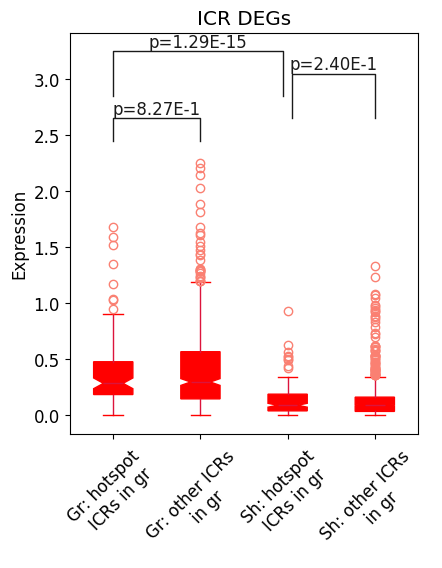

In [3434]:
srt = st[st["echid_status_8.1.24"]=="growing"].index
data1 = np.asarray(exp[srt].loc[hotspot_deg_icr.index]).flatten()
data2 = np.asarray(exp[srt].loc[ext_deg_icr.index]).flatten()

srt = st[st["echid_status_8.1.24"]=="shrinking"].index
data3 = np.asarray(exp[srt].loc[hotspot_deg_icr.index]).flatten()
data4 = np.asarray(exp[srt].loc[ext_deg_icr.index]).flatten()

data = [data1, data2, data3, data4]


# Create the boxplot
plt.figure(figsize=(4.5, 5.2))
c='red'
plt.boxplot(data, labels=["Growing Hotspot ICRs", "Growing Ext ICRs", "Shrinking", "Shrinking Ext"], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color='crimson'),
            flierprops=dict(color='salmon', markeredgecolor='salmon'),
            medianprops=dict(color='crimson'),)

x1, x2 = 1,2
y, h, col = max(map(max, data)) + .2, .2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
p = scipy.stats.mannwhitneyu(data1, data2)[1]
p = "{:.2E}".format(Decimal(p))
plt.text((x1+x2)*.5, y+h, "p="+str(p), ha='center', va='bottom', color=col)

x1, x2 = 1,2.95
y, h, col = max(map(max, data)) + .6, .4, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
p = scipy.stats.mannwhitneyu(data1, data3)[1]
p = "{:.2E}".format(Decimal(p))
plt.text((x1+x2)*.5, y+h, "p="+str(p), ha='center', va='bottom', color=col)

x1, x2 = 3.05,4
y, h, col = max(map(max, data)) + .4, .4, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
p = scipy.stats.mannwhitneyu(data3, data4)[1]
p = "{:.2E}".format(Decimal(p))
plt.text((x1+x2)*.5, y+h, "p="+str(p), ha='center', va='bottom', color=col)

plt.xticks(ticks=np.arange(1,5), labels=(["Gr: hotspot \nICRs in gr",
                                        "Gr: other ICRs \nin gr",
                                        "Sh: hotspot \nICRs in gr",
                                        "Sh: other ICRs \nin gr",]), rotation=45)

plt.title("ICR DEGs")
plt.ylabel("Expression")
plt.savefig("FIGURES1/ICR_expression_boxplot.pdf",dpi=300, bbox_inches='tight')
plt.show()


(4665, 1)


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



(-0.2, 2.4)

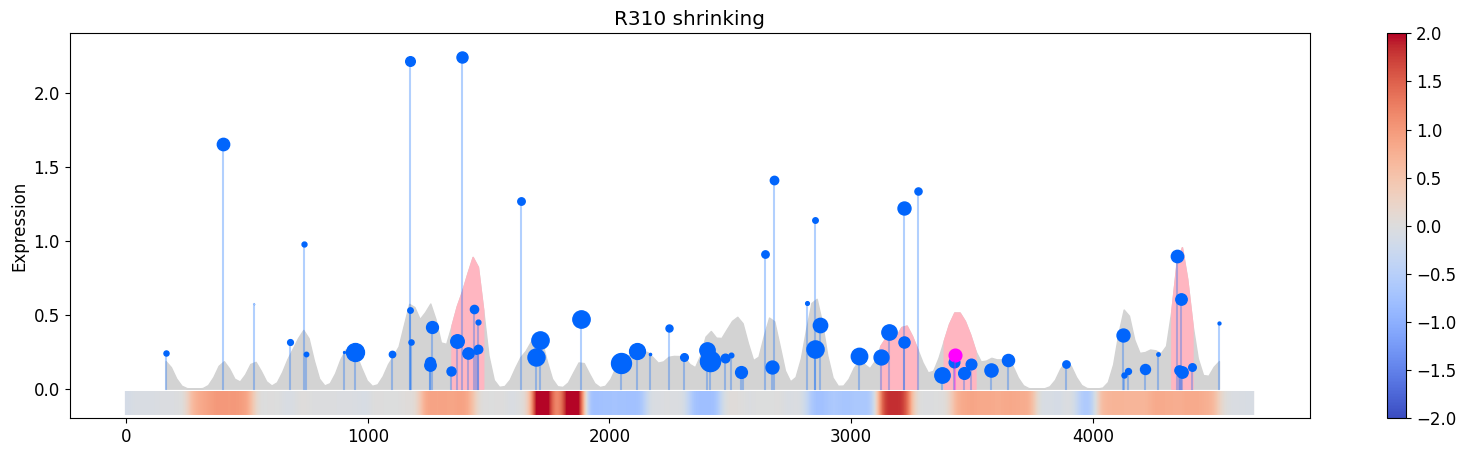

In [3410]:
tmp,tmp_ip, x, y  = loll_that_pop("R310","shrinking",degs_shrinking, shrinking_states, bw_adjust=.06, prominence=.3)
plt.title("R310 shrinking")
plt.ylim([-.2,2.4])
#plt.savefig("FIGURES/shrinking_hotspots.pdf",dpi=300)

In [3411]:
inds = [i for i in hvg_dict["R310"] if i in shrinking_states.index]
states = states.loc[inds]


plotlist_shrink = []
alls = []
for i in range(len(x)):
    deg_df = degs_shrinking["R310"].loc[inds]
    deg_df.index = deg_df.names
    deg_df = deg_df.loc[tmp.iloc[x[i]:y[i]].index]
    deg_df = deg_df[deg_df["pvals_adj"]<.05]
    deg_df = deg_df[deg_df["logfoldchanges"]>0].sort_values(by="logfoldchanges",ascending=False)
    alls+=list(deg_df.index)
    print(deg_df.iloc[0:10].index)
    plotlist_shrink+=list(deg_df.iloc[0:10].index)

Index(['SORBS2', 'LINC02196', 'FBXL7', 'ALPK1', 'FSTL5', 'LINC02241', 'INPP4B',
       'MAML3', 'LINC02109', 'RNF150'],
      dtype='object', name='genes')
Index(['OBI1-AS1', 'EDNRB', 'NBEA', 'LINC00327', 'STXBP6', 'NUBPL', 'DLEU1',
       'SETDB2', 'UGGT2', 'LINC00571'],
      dtype='object', name='genes')
Index(['GABRG3', 'SEMA6D', 'TRPM1', 'ALDH1A2', 'DPH6', 'SHC4', 'FAM227B',
       'DMXL2', 'RIN3', 'CAPN3'],
      dtype='object', name='genes')
Index(['MIR646HG', 'FAM3B', 'LINC01524', 'NCAM2', 'LINC01695', 'SLCO4A1',
       'SS18L1', 'SLC9A8', 'NFATC2', 'SETD4'],
      dtype='object', name='genes')


In [3412]:
st = status.loc[[i for i in status.index if "R310" in i]]
srt = st[st["echid_status_8.1.24"]=="shrinking"].index

df = degs_shrinking["R310"]
df = df[df.pvals_adj<.05]
df = df[df.logfoldchanges>0]

data = ip[srt]
data['gene'] = data.index
data.set_index('gene', inplace=True)
#data['variance'] = data.var(axis=1)

filtered_data = data.loc[df.index]

# Reset index to have gene as a column again
filtered_data.reset_index(inplace=True)

data_long = filtered_data.melt(id_vars=['names'], var_name='cluster', value_name='score')
data_long.columns = ["gene","cluster","score"]
# Rank genes within each cluster
data_long['rank'] = data_long.groupby('cluster')['score'].rank(ascending=False)

/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_31817/3375058690.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3413]:
len(alls)

304

In [3415]:
filtered_data

,names,R310_0,R310_1,R310_10,R310_11,R310_2,R310_4,R310_7,R310_8
0,LINC01531,0.849696,0.246905,-0.918846,0.279247,0.517678,-1.870742,-0.224574,0.392190
1,GALNT18,0.444433,0.006651,-0.951978,-0.098594,-0.375028,-2.591874,0.266885,-0.148444
2,ZNF503-AS1,0.403861,0.090178,-1.457588,-0.094920,-0.157429,-1.599784,-0.032078,-0.034768
3,SORBS2,0.649269,0.668597,-0.116448,0.305727,0.444932,-1.801853,0.589827,0.658571
4,AC010148.1,0.393514,-0.283805,-0.826600,-0.132515,-0.567085,0.120681,-0.448174,-0.155172
...,...,...,...,...,...,...,...,...,...
2476,MACROD1,0.004412,0.194809,-1.111657,-0.177022,-0.213505,-0.347312,-0.068011,0.308040
2477,PARVB,0.400517,0.556352,-0.012252,0.318921,0.483960,0.660606,0.224359,0.584351
2478,PIGK,-0.540869,0.164379,-1.492368,-0.261599,0.247345,-0.066734,-0.042869,-0.062778
2479,CARS,0.027390,0.074293,-0.621935,0.194759,-0.458905,-0.015385,-0.417382,-0.099077


In [3356]:
subset_genes_high = alls
results = []
for cluster in data_long['cluster'].unique():
    es, p_value, std = permutation_test_es(data_long, cluster, subset_genes_high, n_permutations=10000)
    results.append({'cluster': cluster, 'enrichment_score': es, 'p_value': p_value, 'std': std})

results_df = pd.DataFrame(results)
results_df['p_value_adj'] = fdr_correction(results_df['p_value'], alpha=0.05)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1550.44it/s]


In [3357]:
results_df

,cluster,enrichment_score,p_value,std,p_value_adj
0,R310_0,0.332972,0.0001,0.021790,0.0001
1,R310_1,0.468191,0.0001,0.020849,0.0001
2,R310_10,0.209798,0.0001,0.026235,0.0001
3,R310_11,0.283752,0.0001,0.021343,0.0001
4,R310_2,0.239038,0.0001,0.023161,0.0001
5,R310_4,0.344325,0.0001,0.021373,0.0001
6,R310_7,0.366619,0.0001,0.021523,0.0001
7,R310_8,0.312909,0.0001,0.021252,0.0001


In [3307]:
plotlist+=plotlist_shrink

In [3058]:
st = status.loc[[i for i in status.index if "R310" in i]]
srt = st[st["echid_status_8.1.24"]=="growing"].index
srt = srt.append(st[st["echid_status_8.1.24"]=="shrinking"].index)

In [3329]:
srt = ['R310_5', 'R310_9', 'R310_3', 'R310_6', 'R310_0', 'R310_1', 'R310_10',
       'R310_11', 'R310_2', 'R310_4', 'R310_7', 'R310_8']

In [3060]:
exp310 = exp[[i for i in exp.columns if "R310" in i]]

In [3061]:
ip310 = ip[[i for i in exp.columns if "R310" in i]]

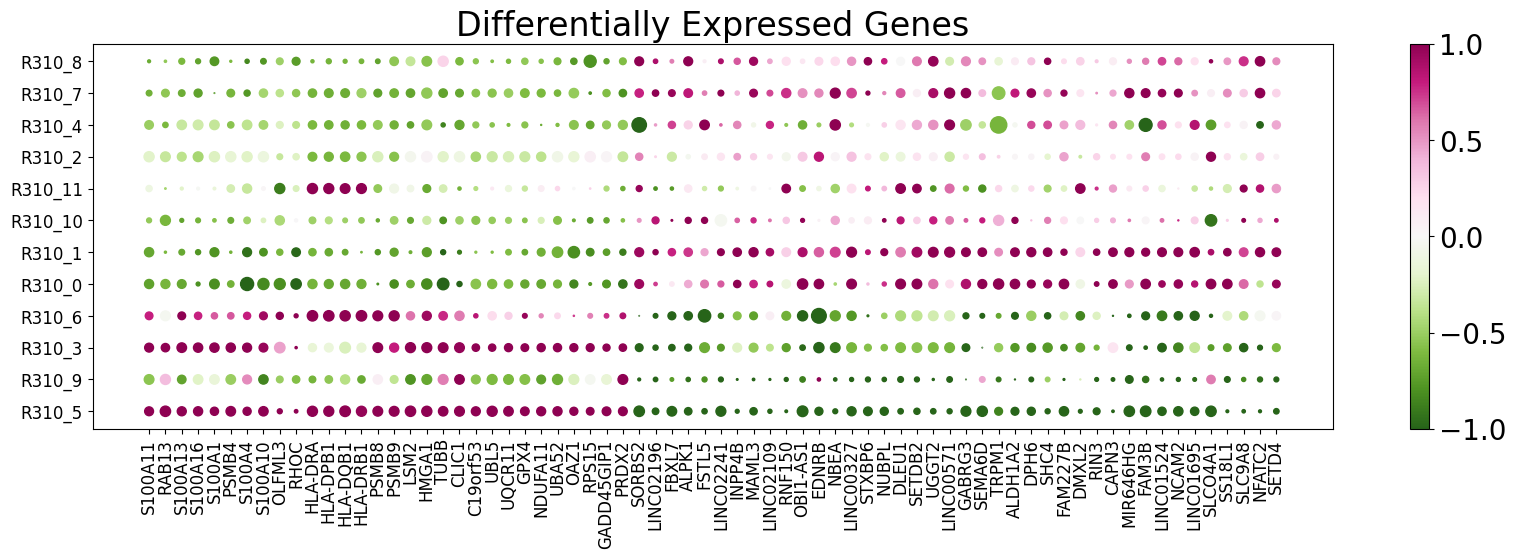

In [3330]:
plot = scipy.stats.zscore(exp310.loc[plotlist][srt].T,axis=0)
plot_ip = ip310.loc[plotlist][srt].T

plt.figure(figsize=(20,5))
for i in range(plot.shape[0]):
    row = plot.iloc[i]
    row_ip = plot_ip.iloc[i]
    plt.scatter(np.arange(plot.shape[1]),[i for j in range(plot.shape[1])],c=row,s=abs(row_ip)*60,cmap='PiYG_r',vmin=-1,vmax=1)
    #plt.scatter([plot.shape[1]+1],[i],c=pal[statuses[i]],marker='s',s=100)
plt.yticks(ticks=np.arange(plot.shape[0]), labels=plot.index, fontsize=12)
plt.xticks(ticks=np.arange(plot.shape[1]), labels=plot.columns, rotation=90, fontsize=12)
plt.title("Differentially Expressed Genes")
plt.colorbar()
plt.savefig("FIGURES/key_genes_dotplot.pdf",dpi=300, bbox_inches='tight')

In [1484]:
def calculate_es(data, genes_of_interest):
    data_sorted = data.sort_values(by='rank')
    hits = data_sorted['gene'].isin(genes_of_interest).astype(int)
    non_hits = 1 - hits
    Nh = hits.sum()
    Nm = non_hits.sum()
    
    # sum of hits vs non hits so if enriched hits should rank towards the top
    Phit = np.cumsum(hits / Nh) if Nh != 0 else np.cumsum(hits)
    Pmiss = np.cumsum(non_hits / Nm) if Nm != 0 else np.cumsum(non_hits)
    
    running_sum = Phit - Pmiss
    ES = running_sum.max()
    
    return ES

def permutation_test_es(data, cluster, genes_of_interest, n_permutations=10000):
    cluster_data = data[data['cluster'] == cluster].copy()

    #limit to positive gde
    cluster_data = cluster_data[cluster_data["score"]>0]
    genes_of_interest = np.intersect1d(genes_of_interest, cluster_data["gene"])
    
    observed_es = calculate_es(cluster_data, genes_of_interest)
    
    perm_es = np.zeros(n_permutations)
    for i in tqdm.tqdm(range(n_permutations)):
        permuted_genes = np.random.permutation(cluster_data['gene'])
        permuted_data = cluster_data.assign(gene=permuted_genes)
        perm_es[i] = calculate_es(permuted_data, genes_of_interest)
    
    # Use a more robust method to calculate p-values
    p_value = (np.sum(perm_es >= observed_es) + 1) / (n_permutations + 1)
    return observed_es, p_value, perm_es.std()

from statsmodels.stats.multitest import multipletests
def fdr_correction(p_values, alpha=0.05):
    # Add small random noise to p-values to reduce ties
    noise = np.random.uniform(0, 1e-10, size=p_values.shape)
    p_values_noisy = p_values + noise
    
    # Apply FDR-BH correction
    rejected, pvals_corrected, _, _ = multipletests(p_values_noisy, alpha=alpha, method='fdr_bh')
    return pd.Series(pvals_corrected, index=p_values.index)

